### News articles classification using Support Vector Machines

#### Libraries used

In [1]:
import re
import os

from nltk.tokenize import word_tokenize
import string
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#### Functions used

In [2]:
def open_read_text(path):
    '''Open and read text file
    Input : path 
    Output: Contents of text file'''
    with open(path, "r", encoding ="utf8") as f:
        text = f.read()
    return text

In [3]:
def clean_text(text):
    '''Tokenization, converting to lower case, remove punctuation, English characters
    Input: the texts in the text files
    Ouptut: A preprocessed text in a list'''
    text = word_tokenize(text)
    text = [w.lower() for w in text]
    text = [w for w in text if w.isalpha()]
    text = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub("[a-z]+", "", text)
    return text

In [4]:
def create_new_data(string):
    '''Create and append cleaned text to txt file
    Input : the text
    Output: a text file in the chosen folder with the text'''
    with open(path, "w", encoding = "utf8") as f:
        str= f.write(string)
        return str

#### Text preprocessing

In [5]:
# make a list of the paths in the right order
path_list= []
for i in range(0,30):
    path_list.append(("C:\\Users\\ntina\\Desktop\\stuff\\economic_txts\\economic" + str(i) +".txt"))
    #print(path_list)

In [6]:
# open the text files and make a list of the texts
textlist = []
for i in path_list:
    textlist.append(open_read_text(i))
    print(textlist) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
# create a dataframe with the texts in each row
df_economic = pd.DataFrame(textlist)
df_economic.columns = ["economic"]
df_economic = df_economic.sort_index()
#print(df_economic)

In [8]:
# use the clean_text function with the apply method in order to preprocess the rows with the texts of the df
clean_df_economic = df_economic.economic.apply(clean_text)
#print(clean_df_economic)

In [9]:
# create 30 text files with the 30 preprocessed financial texts
for i in range(0,30):
    clean_df_economic.loc[i]
    path = "C:\\Users\\ntina\\Desktop\\stuff\\clean_econ\\clean_econ_txt" + str(i) + '.txt'
    create_new_data(clean_df_economic.loc[i])

In [10]:
#make a list of the paths for the politics texts
path_list_politics = []
for i in range(30,69):
    path_list_politics.append(("C:\\Users\\ntina\\Desktop\\stuff\\politics_txts\\politics" + str(i) +".txt"))
    #print(path_list_politics)

In [11]:
# open the text files and make a list of the texts
text_list_politics = []
for i in path_list_politics:
    text_list_politics.append(open_read_text(i))

In [12]:
# create dataframe with the texts
df_politics = pd.DataFrame(text_list_politics)
df_politics.columns = ["politics"]
df_politics.index = pd.RangeIndex(start=30, stop=69, step=1)
#print(df_politics)

In [13]:
#apply the function for text cleaning
clean_df_politics = df_politics.politics.apply(clean_text)
#print(clean_df_politics)

In [14]:
#create new text files with the preprocessed texts
for k in range(30,69):
    clean_df_politics.loc[k]
    path = "C:\\Users\\ntina\\Desktop\\stuff\\clean_politics\\clean_politics_txt"+ str(k) + ".txt"
    create_new_data(clean_df_politics.loc[k])

In [15]:
#makes a list with the paths in the right order
path_list_sports = []
for l in range(69,90):
    path_list_sports.append(("C:\\Users\\ntina\\Desktop\\stuff\\sports_txts\\sports" + str(l) +".txt"))
    #print(path_list_sports)

In [16]:
# open the text files and make a list of the texts
text_list_sports = []
for m in path_list_sports:
    text_list_sports.append(open_read_text(m))
#print(text_list_sports)

In [17]:
# make a dataframe with the right indexes for the text
df_sports = pd.DataFrame(text_list_sports)
df_sports.columns = ["sports"]
df_sports.index = pd.RangeIndex(start=69, stop=90, step=1)
#print(df_sports)

In [18]:
# apply the function clean_text to preprocess all the politics texts
clean_df_sports = df_sports.sports.apply(clean_text)
#print(clean_df_sports)

In [19]:
# create new text files with the preprocessed texts
for n in range(69,90):
    clean_df_sports.loc[n]
    path = "C:\\Users\\ntina\\Desktop\\stuff\\clean_sports\\clean_sports_txt" + str(n) + ".txt"
    create_new_data(clean_df_sports.loc[n])

In [20]:
#concatenate all thre data frames to one
cleaned_df_texts =pd.concat([clean_df_economic, clean_df_politics, clean_df_sports])
cleaned_df_texts= cleaned_df_texts.to_frame()
cleaned_df_texts.columns= ['Clean_texts']

#### Load Excel file

In [21]:
#open excel
df_excel = pd.read_excel("C:\\Users\\ntina\\Desktop\\stuff\\alltexts.xlsx")
print(df_excel.head())

   Unnamed: 0 Label                                               Text
0           1  econ  Τροπολογία η οποία θα προβλέπει την επιτάχυνση...
1           2  econ  Στόχος της κυβέρνησης είναι να επιτύχει υψηλότ...
2           3  econ  Περισσότερες από 4.000 επιχειρήσεις έχουν ήδη ...
3           4  econ  «Το 40% των εργαζομένων που εργάζεται υπερωρια...
4           5  econ  Ταμειακά διαθέσιμα μόλις για ένα μήνα έχει η μ...


In [22]:
# convert dataframe of the cleaned texts to a list and append it to our dataframe
cleaned_df_texts= cleaned_df_texts.Clean_texts.tolist()
df_excel['Clean_texts'] = cleaned_df_texts

In [23]:
#remove the column of the raw texts
df_excel = df_excel.drop(["Text"], axis =1)

In [24]:
# export dataframe to excel file
df_excel.to_excel(r"C:\\Users\\ntina\\Desktop\\stuff\\data.xlsx", index = False)

#### Vectorization using TF-IDF

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [42]:
#convert categorical variables (the lables of our texts) to integers
le.fit(df_excel["Label"])
list(le.classes_)
le.transform(df_excel['Label'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
# the frequency of each word in the corpus, ignore terms that are contained in more that 70% of the corpus
tfidf_vec = TfidfVectorizer(max_df=0.7)
X = tfidf_vec.fit_transform(df_excel["Clean_texts"])

#print(X.shape)
#print(tfidf_vec.get_feature_names())

In [44]:
# we create a dataframe with all 9041 features
X_df = pd.DataFrame(X.toarray())
print(X_df.head())

   0     1     2     3     4     5     6     7     8     9     ...  8928  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      8929  8930  8931      8932      8933  8934  8935  8936  8937  
0  0.00000   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0   0.0  
1  0.00000   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0   0.0  
2  0.05318   0.0   0.0  0.000000  0.000000   0.0   0.0   0.0   0.0  
3  0.00000   0.0   0.0  0.000000  0.054215   0.0   0.0   0.0   0.0  
4  0.00000   0.0   0.0  0.037159  0.000000   0.0   0.0   0.0   0.0  

[5 rows x 8938 columns]


#### Split into train/test

In [47]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_df,df_excel['Label'], test_size = 0.20, random_state= 1)

#### SVM classifier

In [48]:
# instantiating svm classifier
classifier = svm.SVC(kernel='linear', C=1)

In [49]:
# fit the model with the training set
classifier.fit(X_train, y_train)


#predicted values
predictions =classifier.predict(X_test)
#print(predictions)


#test model's accuracy
classifier.score(X_test, y_test)

['politics' 'sports' 'politics' 'politics' 'sports' 'sports' 'sports'
 'politics' 'politics' 'politics' 'politics' 'politics' 'sports' 'econ'
 'politics' 'sports' 'econ' 'econ']


1.0

In [50]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[3 0 0]
 [0 9 0]
 [0 0 6]]


In [34]:
#evaluation of precision,recall, fscore for svm classifier
precision,recall, f_score, train_support = score(y_test, predictions, average = "macro")
print("Precision:", round(precision,3), "Recall:", round(recall,3), "F_score:", round(f_score,3))

Precision: 1.0 Recall: 1.0 F_score: 1.0


C:\Users\ntina\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


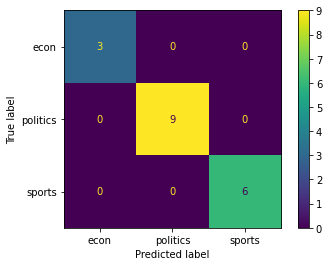

In [52]:
#plot the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()